In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image
from tensorflow import keras
import tensorflow.keras.layers as k


In [ ]:
!pip install --upgrade keras

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


In [17]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img


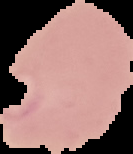

In [18]:
load_img('/kaggle/input/malarial-cell-image/Malarial Cell Image Data /cell_images/Parasitized/C100P61ThinF_IMG_20150918_144104_cell_166.png')

In [19]:
os.environ['KERAS_BACKEND']='tensorflow'
np.random.seed(312)

In [20]:
imagedir='/kaggle/input/malarial-cell-image/Malarial Cell Image Data /cell_images/'
size=64
dataset=[]
label=[]

In [25]:
pip install --upgrade pillow

/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


Note: you may need to restart the kernel to use updated packages.


In [28]:
parasitized=os.listdir(imagedir+'Parasitized/')
for i,img in enumerate(parasitized):
    if(img.split('.')[1]=='png'):
        image=cv2.imread(imagedir+'Parasitized/'+img)
        image=Image.fromarray(image,'RGB')
        image=image.resize((size,size))
        
        dataset.append(np.array(image))
        label.append(0)
        
    
    

In [29]:
uninfected=os.listdir(imagedir+'Uninfected/')
for i,img in enumerate(parasitized):
    if(img.split('.')[1]=='png'):
        image=cv2.imread(imagedir+'Parasitized/'+img)
        image=Image.fromarray(image,'RGB')
        image=image.resize((size,size))
        
        dataset.append(np.array(image))
        label.append(1)
        
    
    

In [32]:
len(parasitized)
len(uninfected)

4133

In [30]:
from tqdm.notebook import tqdm

In [34]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
xtrain,xtest,ytrain,ytest=train_test_split(dataset,to_categorical(np.array(label)),test_size=0.2,random_state=0)


**CNN MODEL Architecture**

In [38]:
input_shape=(size,size,3)
in1=k.Input(shape=input_shape)
conv1=k.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same')(in1)
pool1=k.MaxPool2D(pool_size=(2,2))(conv1)
norm1=k.BatchNormalization(axis=-1)(pool1)
drop1=k.Dropout(rate=0.2)(norm1)

conv2=k.Conv2D(32,kernel_size=(3,3),activation='relu',padding='same')(drop1)
pool2=k.MaxPool2D(pool_size=(2,2))(conv2)
norm2=k.BatchNormalization(axis=-1)(pool2)
drop2=k.Dropout(rate=0.2)(norm2)

flat=k.Flatten()(drop2)

hidden1=k.Dense(512,activation='relu')(flat)
norm3=k.BatchNormalization(axis=-1)(hidden1)
drop3=k.Dropout(rate=0.2)(norm3)

hidden2=k.Dense(256,activation='relu')(drop3)
norm4=k.BatchNormalization(axis=-1)(hidden2)
drop4=k.Dropout(rate=0.2)(norm4)

out=k.Dense(2,activation='sigmoid')(drop4)






In [43]:
model=keras.Model(inputs=in1,outputs=out)
model.compile(optimizer='adam',metrics=['accuracy'],loss='categorical_crossentropy')
model.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 64, 64, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     4,194,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,340,130 (16.56 MB)

 Trainable params: 4,338,466 (16.55 MB)

 Non-trainable params: 1,664 (6.50 KB)

In [44]:
his=model.fit(np.array(xtrain),ytrain,batch_size=64,verbose=1,epochs=5,validation_split=0.1,shuffle=False)

Epoch 1/5
311/311 ━━━━━━━━━━━━━━━━━━━━ 94s 290ms/step - accuracy: 0.4871 - loss: 0.9239 - val_accuracy: 0.5077 - val_loss: 0.7270
Epoch 2/5
311/311 ━━━━━━━━━━━━━━━━━━━━ 89s 286ms/step - accuracy: 0.4934 - loss: 0.7320 - val_accuracy: 0.5159 - val_loss: 0.7054
Epoch 3/5
311/311 ━━━━━━━━━━━━━━━━━━━━ 90s 289ms/step - accuracy: 0.4972 - loss: 0.7105 - val_accuracy: 0.5009 - val_loss: 0.7015
Epoch 4/5
311/311 ━━━━━━━━━━━━━━━━━━━━ 89s 285ms/step - accuracy: 0.4967 - loss: 0.7040 - val_accuracy: 0.5063 - val_loss: 0.6988
Epoch 5/5
311/311 ━━━━━━━━━━━━━━━━━━━━ 144s 290ms/step - accuracy: 0.5082 - loss: 0.7016 - val_accuracy: 0.4991 - val_loss: 0.6983


In [53]:
model.evaluate(np.array(xtest), np.array(ytest))


173/173 ━━━━━━━━━━━━━━━━━━━━ 6s 36ms/step - accuracy: 0.4777 - loss: 0.7027


[0.7013449668884277, 0.48695650696754456]